In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(8.0, 4.0), dpi=180)

import jhwutils
from jhwutils.matrices import show_boxed_tensor_latex, print_matrix, show_boxed_tensor_latex
from jhwutils.float_inspector import print_shape_html, print_float, print_float_html



/Users/ckane/opt/anaconda3/lib/python3.9/site-packages/IPython/kernel/__init__.py:12: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  warn("The `IPython.kernel` package has been deprecated since IPython 4.0."


### Vectorised computation

Using variables stored in ``ndarrays`` we can do calculations on the qhole array at once: much faster than using a loop

In [2]:
a = np.arange(5)
b = np.arange(5,10)
print_matrix("a",a)
print_matrix("b",b)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [3]:
print_matrix("a+b",a+b)

<IPython.core.display.Latex object>

We can perform a number of other **elementary operations** on these arrays

In [4]:
print("np.mean(a) = ",np.mean(a))
print("a+1 = ",a+1)
print("a+b = ",a+b)
print("2*(a) = ",2*(a))
print("2*(a+1) = ",2*(a+1))
print("a*b = ",a*b)

np.mean(a) =  2.0
a+1 =  [1 2 3 4 5]
a+b =  [ 5  7  9 11 13]
2*(a) =  [0 2 4 6 8]
2*(a+1) =  [ 2  4  6  8 10]
a*b =  [ 0  6 14 24 36]


We can join these arrays together in whichever dimension we like

In [5]:
print_matrix("np.hstack((a,b))",np.hstack((a,b)))
print(np.hstack((a,b)).shape)
print_matrix("np.vstack((a,b))",np.vstack((a,b)))
print(np.vstack((a,b)).shape)
show_boxed_tensor_latex(np.dstack((a,b)))
print(np.dstack((a,b)).shape)


<IPython.core.display.Latex object>

(10,)


<IPython.core.display.Latex object>

(2, 5)


<IPython.core.display.Latex object>

(1, 5, 2)


This also works in higher dimensions:

In [6]:
a2 = np.reshape(np.arange(9),(3,3))
b2 = np.reshape(np.arange(9,18),(3,3))

print_matrix("np.reshape(np.arange(9),(3,3))",a2)

print_matrix("np.reshape(np.arange(9,18),(3,3))",b2)

show_boxed_tensor_latex(np.hstack((a2,b2)))
show_boxed_tensor_latex(np.vstack((a2,b2)))
show_boxed_tensor_latex(np.dstack((a2,b2)))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We can "slice" to choose subsets of an array:

In [7]:
# choose first row
print_matrix("a2 [0,:]",a2 [0,:])
# choose and higher rows sencond rows
print_matrix("a2 [1:,:]",a2 [1:,:])
# choose second column
print_matrix("a2 [:,1]",a2 [:,1])
# choose 2x2 array from larger array
print_matrix("np.reshape(np.arange(9),(3,3))",a2)
print_matrix("a2 [:2,1:]",a2 [:2,1:])


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We can boolean index arrays:

In [8]:
x = np.arange(16)
print_matrix("x",x)
print_matrix("x[x>8]",x[x>8])
print_matrix("x[x\%2==0]",x[np.where(x%2==0)])


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [9]:
print_matrix("np.where(x > 5, 1, 0)",np.where(x > 5, 1, 0))

<IPython.core.display.Latex object>

We can find where the minimum or maximum of an arry is:

In [10]:
print("np.argmin(x) = ",np.argmin(x))
print("np.argmax(x) = ",np.argmax(x))

np.argmin(x) =  0
np.argmax(x) =  15


### Rearranging arrays

In [11]:
x = np.reshape(np.arange(16),(4,4))
print_matrix("x",x)
print_matrix("x.T",x.T)
print_matrix("np.fliplr(x)",np.fliplr(x))
print_matrix("np.flipud(x)",np.flipud(x))
print_matrix("np.rot90(x)",np.rot90(x))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Strides
For an array the striding pattern tells us how to move through it to move between columns/rows

Define a 2D array and inspect strides:

In [12]:
x4 = np.reshape(np.arange(16),(4,4))
print_matrix("x4",x4)
#print_float("")
print("x4.strides = ",x4.strides)

<IPython.core.display.Latex object>

x4.strides =  (16, 4)


#### Actions that rearrange an array change striding pattern rather than actually rearranging anything in memory

In [13]:
print("x4.T.strides = ",x4.T.strides)
print("np.fliplr(x4).strides = ",np.fliplr(x4).strides)
print("np.flipud(x4).strides = ",np.flipud(x4).strides)
print("np.rot90(x4).strides = ",np.rot90(x4).strides)

x4.T.strides =  (4, 16)
np.fliplr(x4).strides =  (16, -4)
np.flipud(x4).strides =  (-16, 4)
np.rot90(x4).strides =  (-4, 16)


### Floating point numbers
#### IEEE754

When we work with floating point numbers we only ever have an approximation of the number we want: for instance $$\frac{1}{3}$$ would be infinitely long if we wanted to store as a decimal fraction so we have to approximate. However, if used carefully these approximations can be useful.

IEEE754 is the standard that defines how these floating point numbers should be handled. We look here at 32-bit floating point number. We consider a single 32 bit binary number to consist of three parts:

    Sign (S)  |  Exponent (E) |  Mantissa (M)
     1 bit    |     8 bits    |    23 bits
     
The Sign can be thought of as a flag to encode if number is positive or negative

    S=0 +
    S=1 -

We subtract 127 from the Exponent so that it can represent numbers from -127 to 128.

For the Mantissa there is an implied 1 and M represents the parts after the decimal place. This means M leads toa number between 1 and 2.

The encoded decimal number is then calculated with:
$$(-1^S)\times 2^{(E-127)}\times1.M $$

If we look at an example:

$$10011001010110000000000000000000$$


    S=1  The number is negative
    E =  00110010 in binary = 50 in decimal and 50-127=-77
    M =  10110000000000000000000 
Putting in the implied leading 1 gives us 1.10110 and a bunch of trailing zeros. Since this is after the decimal place trailing zeros have no effect.

You may never have dealt with binary fractions before but it works in much the same way as decimal fractions. Starting with a decimal fraction 326.532

     3     2       6   .   5      3        2
    100  | 10   |  1   |  0.1  | 0.01  | 0.001
    10^2 | 10^1 | 10^0 | 10^-1 | 10^-2 | 10^-3

The same idea works in binary: so with our example

    1   .  1      0      1      1      0 
    1   | 1/2  | 1/4  | 1/8  | 1/16 | 1/32
    2^0 | 2^-1 | 2^-2 | 2^-3 | 2^-4 | 2^-5
    
So the number we want is $$ 1+\frac{1}{2}+0+\frac{1}{8}+\frac{1}{16}+0  = \frac{27}{16} = 1.6875$$

We now have all the parts we need to use in the formula
$$(-1^S)\times 2^{(E-127)}\times1.M $$


In [2]:
FPN = -(2**(3))*1.8125
FPN

**All floating point numbers are is a compact way to represent numbers of very large range, by allowing a fractional number with a standardised range (*mantissa*, varies from 1.0 to just less than 2.0) with a scaling or stretching factor (*exponent*, varies in steps of powers of 2).**

<img src="imgs/floats.svg" width="100%">


### Floating point exceptions

There are 5 exceptions that can occur from floating point operations

* **Invalid Operation**
Occurs when an operation without a defined real number result is attempted, like 0.0 / 0.0 or sqrt(-1.0).

*  **Division by Zero**
Occurs when dividing by zero.

* **Overflow**
Occurs if the result of a computation exceeds the limits of the floating point number (e.g. a `float64` operations results in a number > 1e308)

* **Underflow**
Occurs if the result of a computation is smaller than the smallest representable number, and so is rounded off to zero.

* **Inexact**
Occurs if a computation will produce an inexact result due to rounding.


### Roundoff

Roundoff error can occur when doing calculations with numbers of very different magnitudes



In [15]:
print_float_html(1.0 + 1e-4) # ok

print_float_html(1.0 + 1e-16) # exactly 1

print_float_html(1e-16 + 1e-16) # ok

### Norms

Norms can be used to represent the distance between 2 vectors. The norm we are most familiar with is the Euclidean or L2 norm
$$||x|| = \sqrt{\Sigma_i(x_i-y_i)^2}$$

This can be implemented in Numpy as:

In [16]:
print(a-b)
print(np.linalg.norm(a-b,2))


[-5 -5 -5 -5 -5]
11.180339887498949


There are a number of other norms e.g. taxicab norm $$||x|| = \Sigma_i(x_i-y_i) $$

In an exam, unless you're told which norm to use, you could use whatever one you want or if the answer  does not require an actual calculation just say you would "use a norm" and don't worry about which one. If you are unsure which norm to use then the Euclidean norm is unlikely to be wrong.

### High dimensional data

All of these operations can be done on data with more dimensions, though it's unuaual to work with more than 6 - it would require storing too much data. Also we have the problem of ...

#### The curse of dimensionality

In high dimensional spaces any random point is much closer to the edge than the centre and the (Euclidean) distance between all pairs of points is almost the same. This make discerning between different points almost impossible.

## Scientific visualisation

#### Grammar of Graphics



* **Stat** A stat is a statistic computed from data which is then mapped onto visual features, with the intent of summarising the data compactly. For example, the mean and the standard deviation of a series of measurements would be stats. The binning of values in a histogram is another example of a stat.

* **Mapping** A mapping represents a transformation of data attributes to visual values. It maps selected attributes (which includes stats or raw dataset values) to visual values using a scale to give units to the attribute.

    * **Scale** a scale specifies the transformation of the units in the dataset/stat to visual units. This might be from the Richter scale to x position, or from altitude to colour, or from condition number to point size. A scale typically specifies the range of values to be mapped.

    * **Guide** A guide is a visual reference which indicates the meaning of a mapping, including the scale and the attribute being mapped. This includes axis tick marks and labels, colour scales, and legends.

* **Geom** A geom is the geometric representation of data after it has been mapped. Geoms include points (which may have size, colour, shape), lines (which may have colour, dash styles, thickness), and patches/polygons (which can have many attributes).

* **Coord** A coord is a coordinate system, which connects mapped data onto points on the plane (or, in general, to higher-dimensional coordinates, like 3D positions). The spatial configuration of geoms and guides depends on the coordinate system.

* **Layer** A layer of a plot is one set of geoms, with one mapping on one coordinate system. Multiple layers may be overlaid on a single coordinate system. For example, two different stats of the same dataset might be plotted on separate layers on the same coordinate system.

* **Facet** A facet is a different view on the same dataset, on a separate coordinate system. For example, two conditions of an experiment might be plotted on two different facets. One facet might have several layers.

* **Figure** A figure comprises a set of one or more facets

* **Caption** Every figure has a caption, which explains the visualisation to the reader.


#### Anatomy of a figure
<img src="imgs/anatomy.png">

*Image: anatomy of a simple scientific graph, taken from the `matplotlib` documentation: http://matplotlib.org/examples/showcase/anatomy.html*

#### Independent and dependent variables

The dependent variable is something we believe to be affected by the value of independent variable

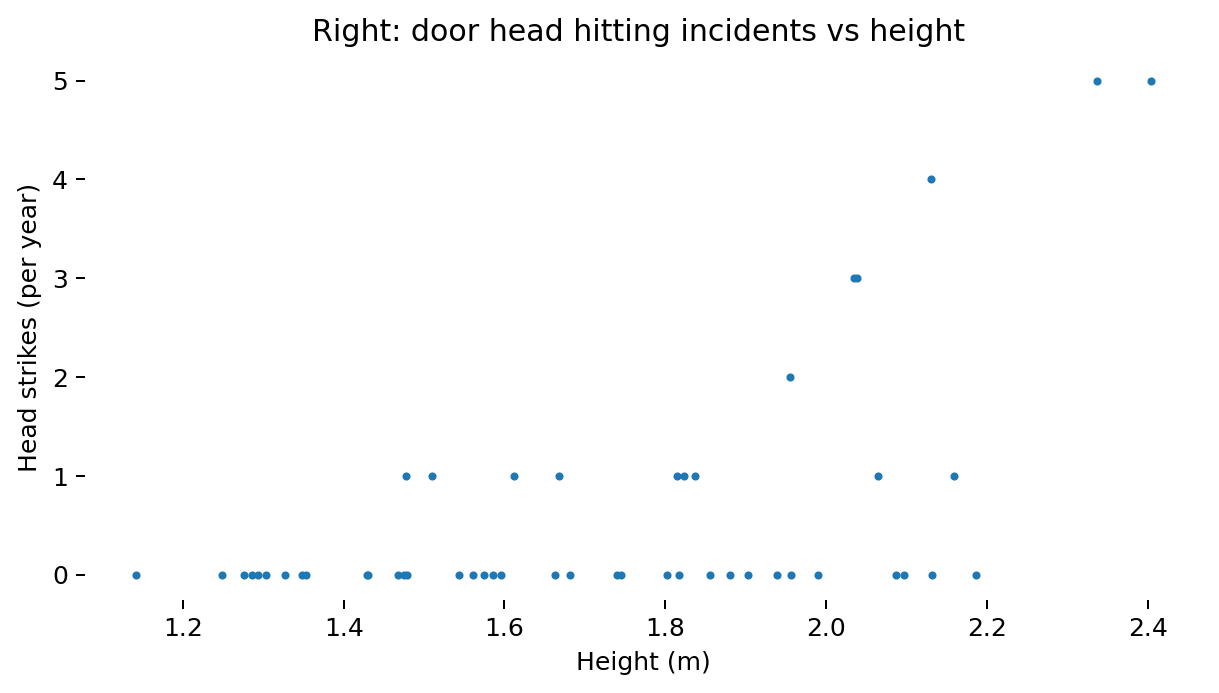

In [77]:
# simulate some data
np.random.seed(20181)
heights = np.random.normal(1.7, 0.3, 50)
head_hitting_incidents = np.floor(np.random.uniform(0,1,heights.shape) * np.exp((heights-1.4)*2))
  
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(heights, head_hitting_incidents, s=5)
ax.set_title("Right: door head hitting incidents vs height ")
ax.set_xlabel("Height (m)")
ax.set_ylabel("Head strikes (per year)")
ax.set_frame_on(False)

## Common 2D plot types
There are a few common 2D plot types. As always, we are working with arrays of data. Our mapping takes *two columns* of a dataset (or a stat of a dataset) and maps one to $x$ and one to $y$.

### Scatterplot

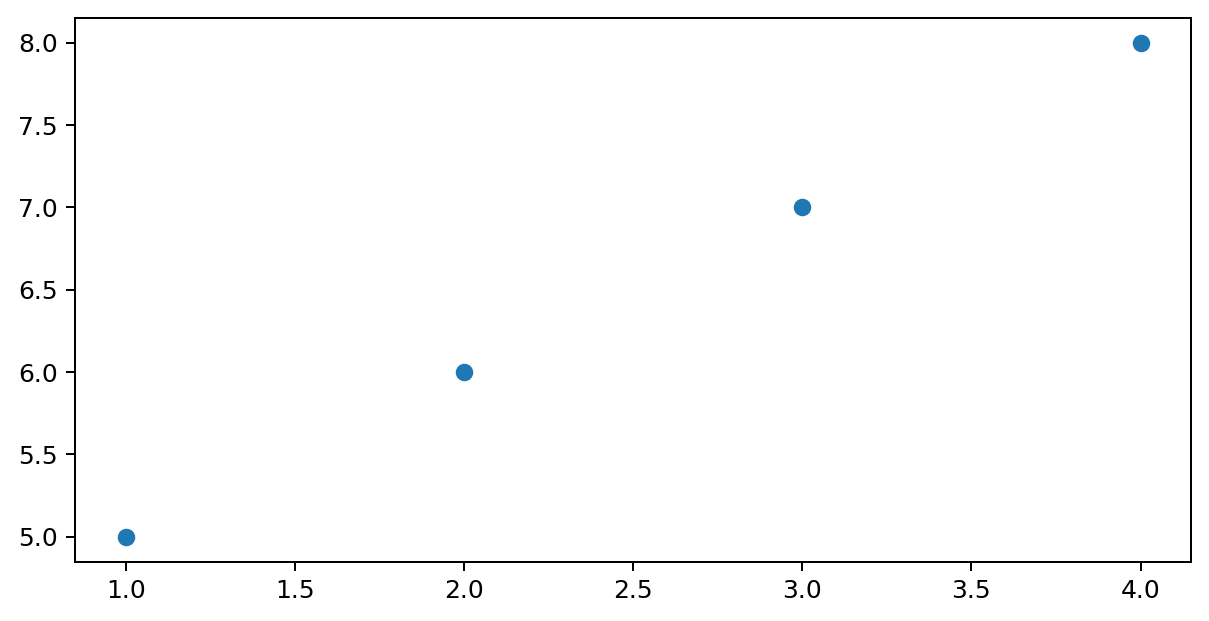

In [79]:
x = np.array([1, 2, 3, 4])
y = np.array([5, 6, 7, 8])
plt.scatter(x, y)

### Bar chart
A bar chart draws bars with height proportional to $y$ at position given by $x$.  These are patch **geoms**.

<BarContainer object of 4 artists>

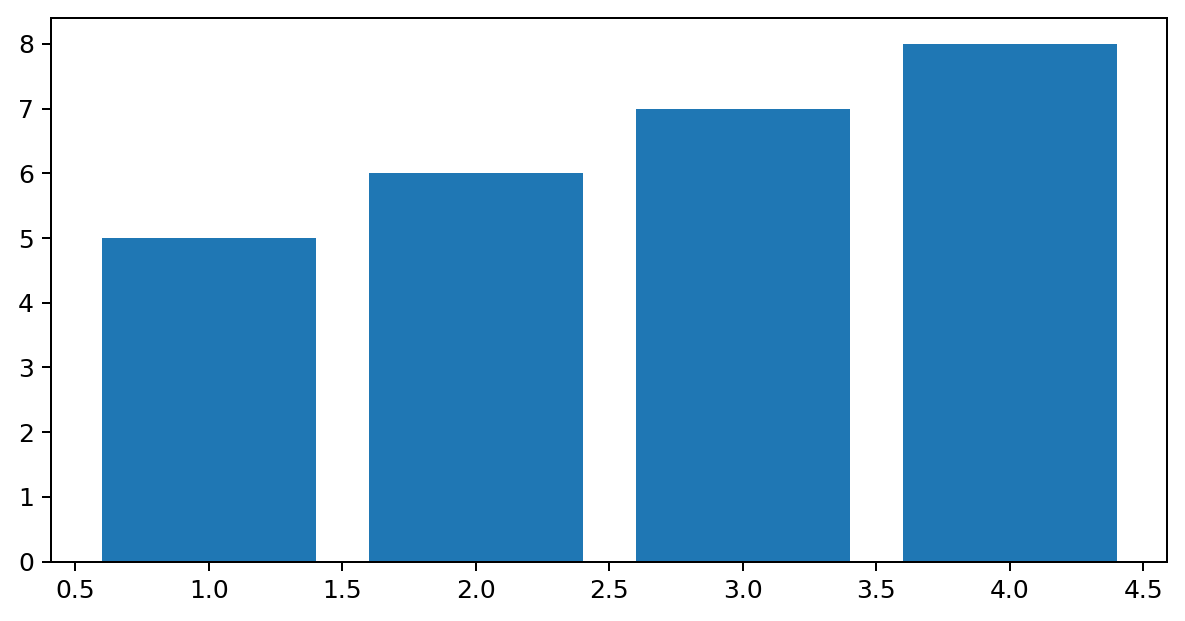

In [81]:
plt.bar(x,y)

### Line plot
A line plot draws connected line segments between (x,y) positions, in the order that they are provided.  These are line **geoms**.

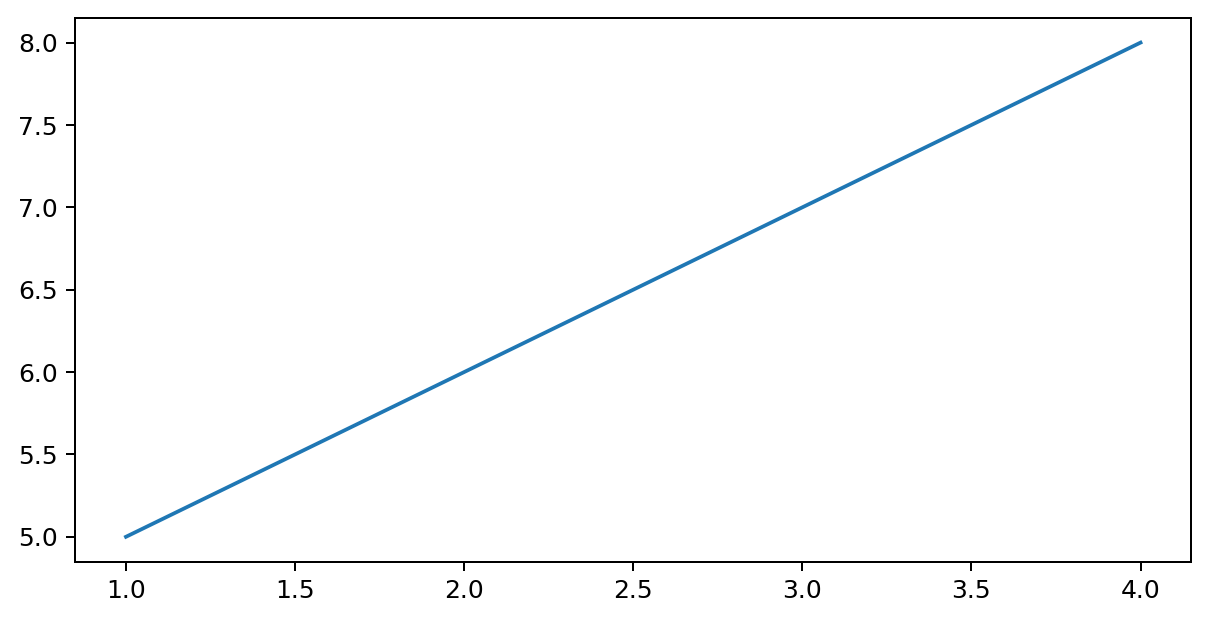

In [82]:
plt.plot(x,y)

#### One dataset many views 



In [83]:
## test data: UK gas usage, quarterly
# columns: index, year, gas (megatherms)
gas = np.loadtxt("data/gas.csv", delimiter=',')

## Straghtforward plot, line+marker

Text(0.5, 1.0, 'UK Gas quarterly gas usage 1960-1986')

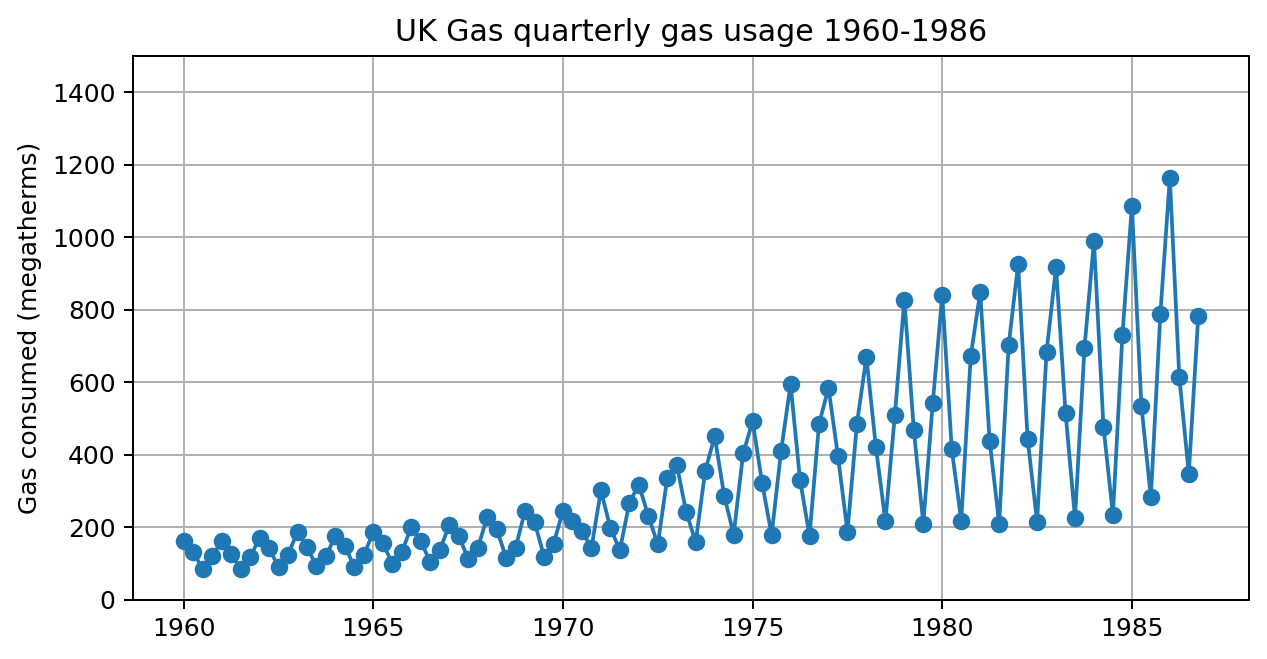

In [85]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(gas[:, 1], gas[:, 2], "-o")
ax.set_ylabel("Gas consumed (megatherms)")
ax.grid("on")
ax.set_ylim(0, 1500)
ax.set_title("UK Gas quarterly gas usage 1960-1986")

## Simplified plot

Running average

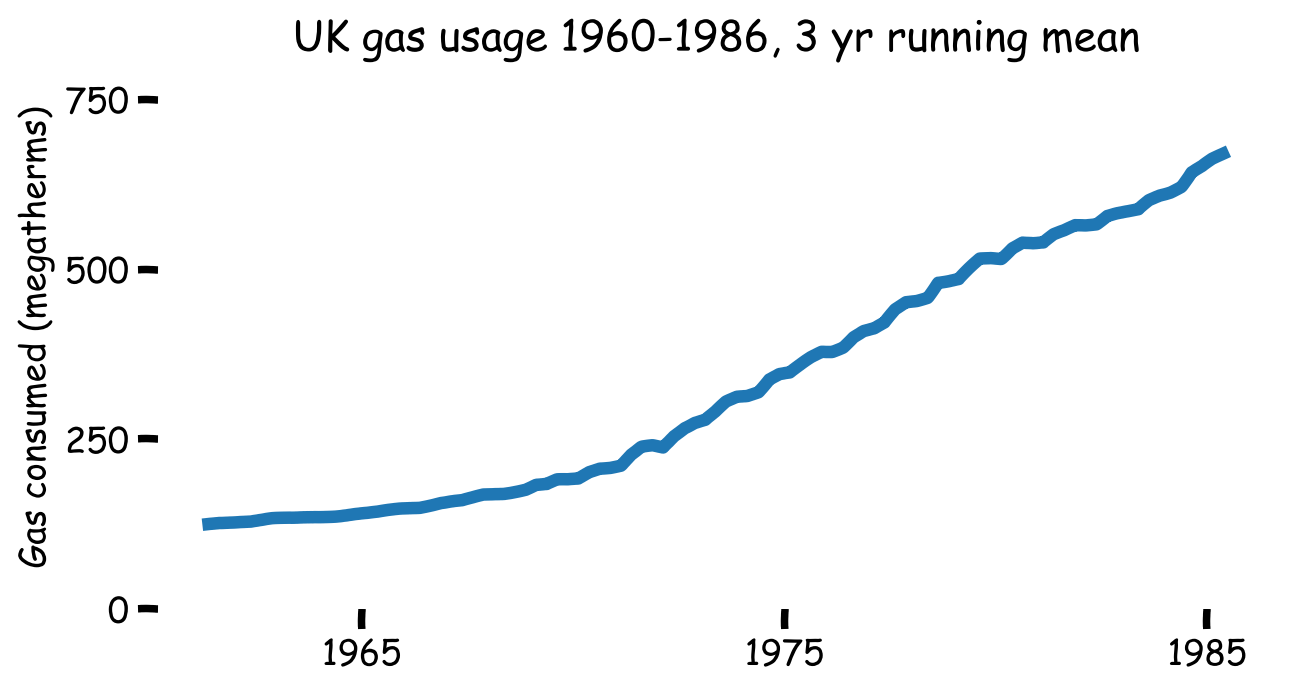

In [86]:
# use the xkcd style
with plt.xkcd():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # don't worry how this works: but it computes a 12 element
    # running mean of the data
    N = 12
    smoothed = np.convolve(gas[:, 2], np.ones((N,)) / N, mode="valid")
    smoothed_t = np.convolve(gas[:, 1], np.ones((N,)) / N, mode="valid")
    ax.plot(smoothed_t, smoothed, linewidth=5)

    ax.set_ylabel("Gas consumed (megatherms)")
    ax.grid("on")
    ax.set_frame_on(False)
    ax.set_xticks([1965, 1975, 1985])
    ax.set_yticks([0, 250, 500, 750])
    ax.set_ylim(0, 800)
    ax.set_title("UK gas usage 1960-1986, 3 yr running mean")

## Layered plot, split by quarters

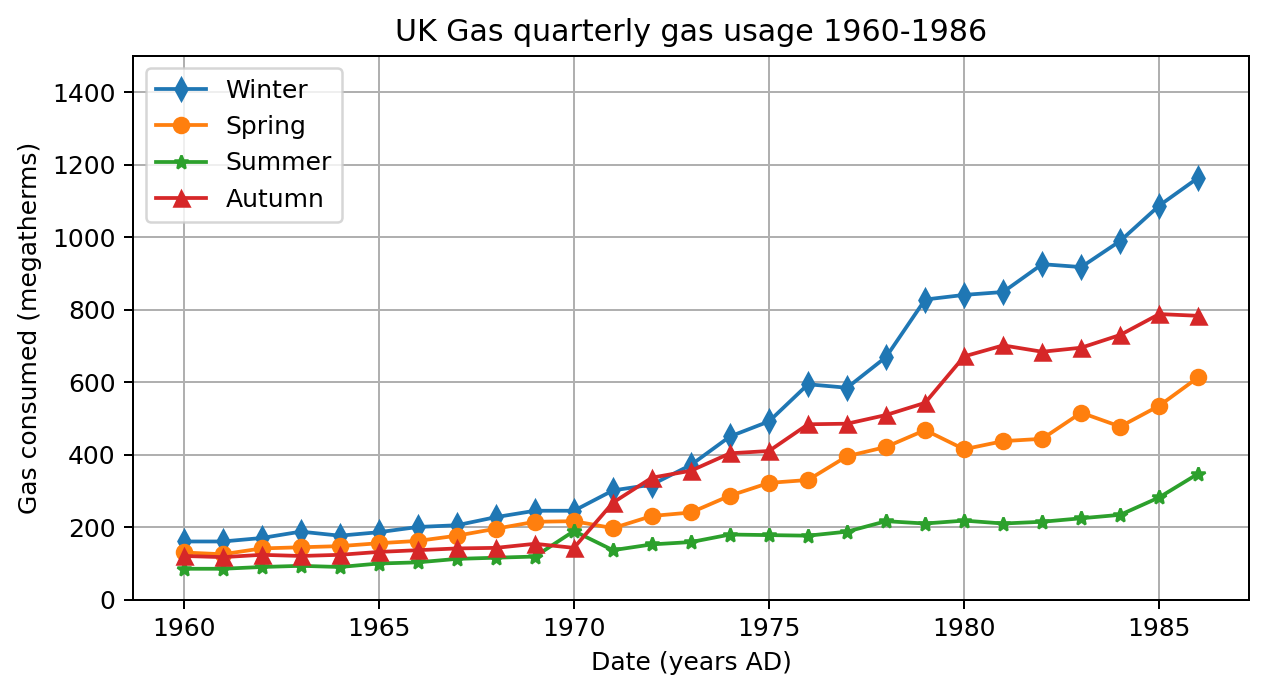

In [87]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

# split into quarterly lines (every fourth element)
q1 = gas[::4, :]
q2 = gas[1::4, :]
q3 = gas[2::4, :]
q4 = gas[3::4, :]

ax.plot(q1[:,1], q1[:,2], label='Winter', marker='d')
ax.plot(q1[:,1], q2[:,2], label='Spring', marker='o')
ax.plot(q1[:,1], q3[:,2], label='Summer', marker='*')
ax.plot(q1[:,1], q4[:,2], label='Autumn', marker='^')

ax.set_xlabel('Date (years AD)')
ax.set_ylabel('Gas consumed (megatherms)')
ax.grid("on")
ax.legend()
ax.set_ylim(0,1500)
ax.set_title("UK Gas quarterly gas usage 1960-1986")
ax.legend()

## Faceted plot

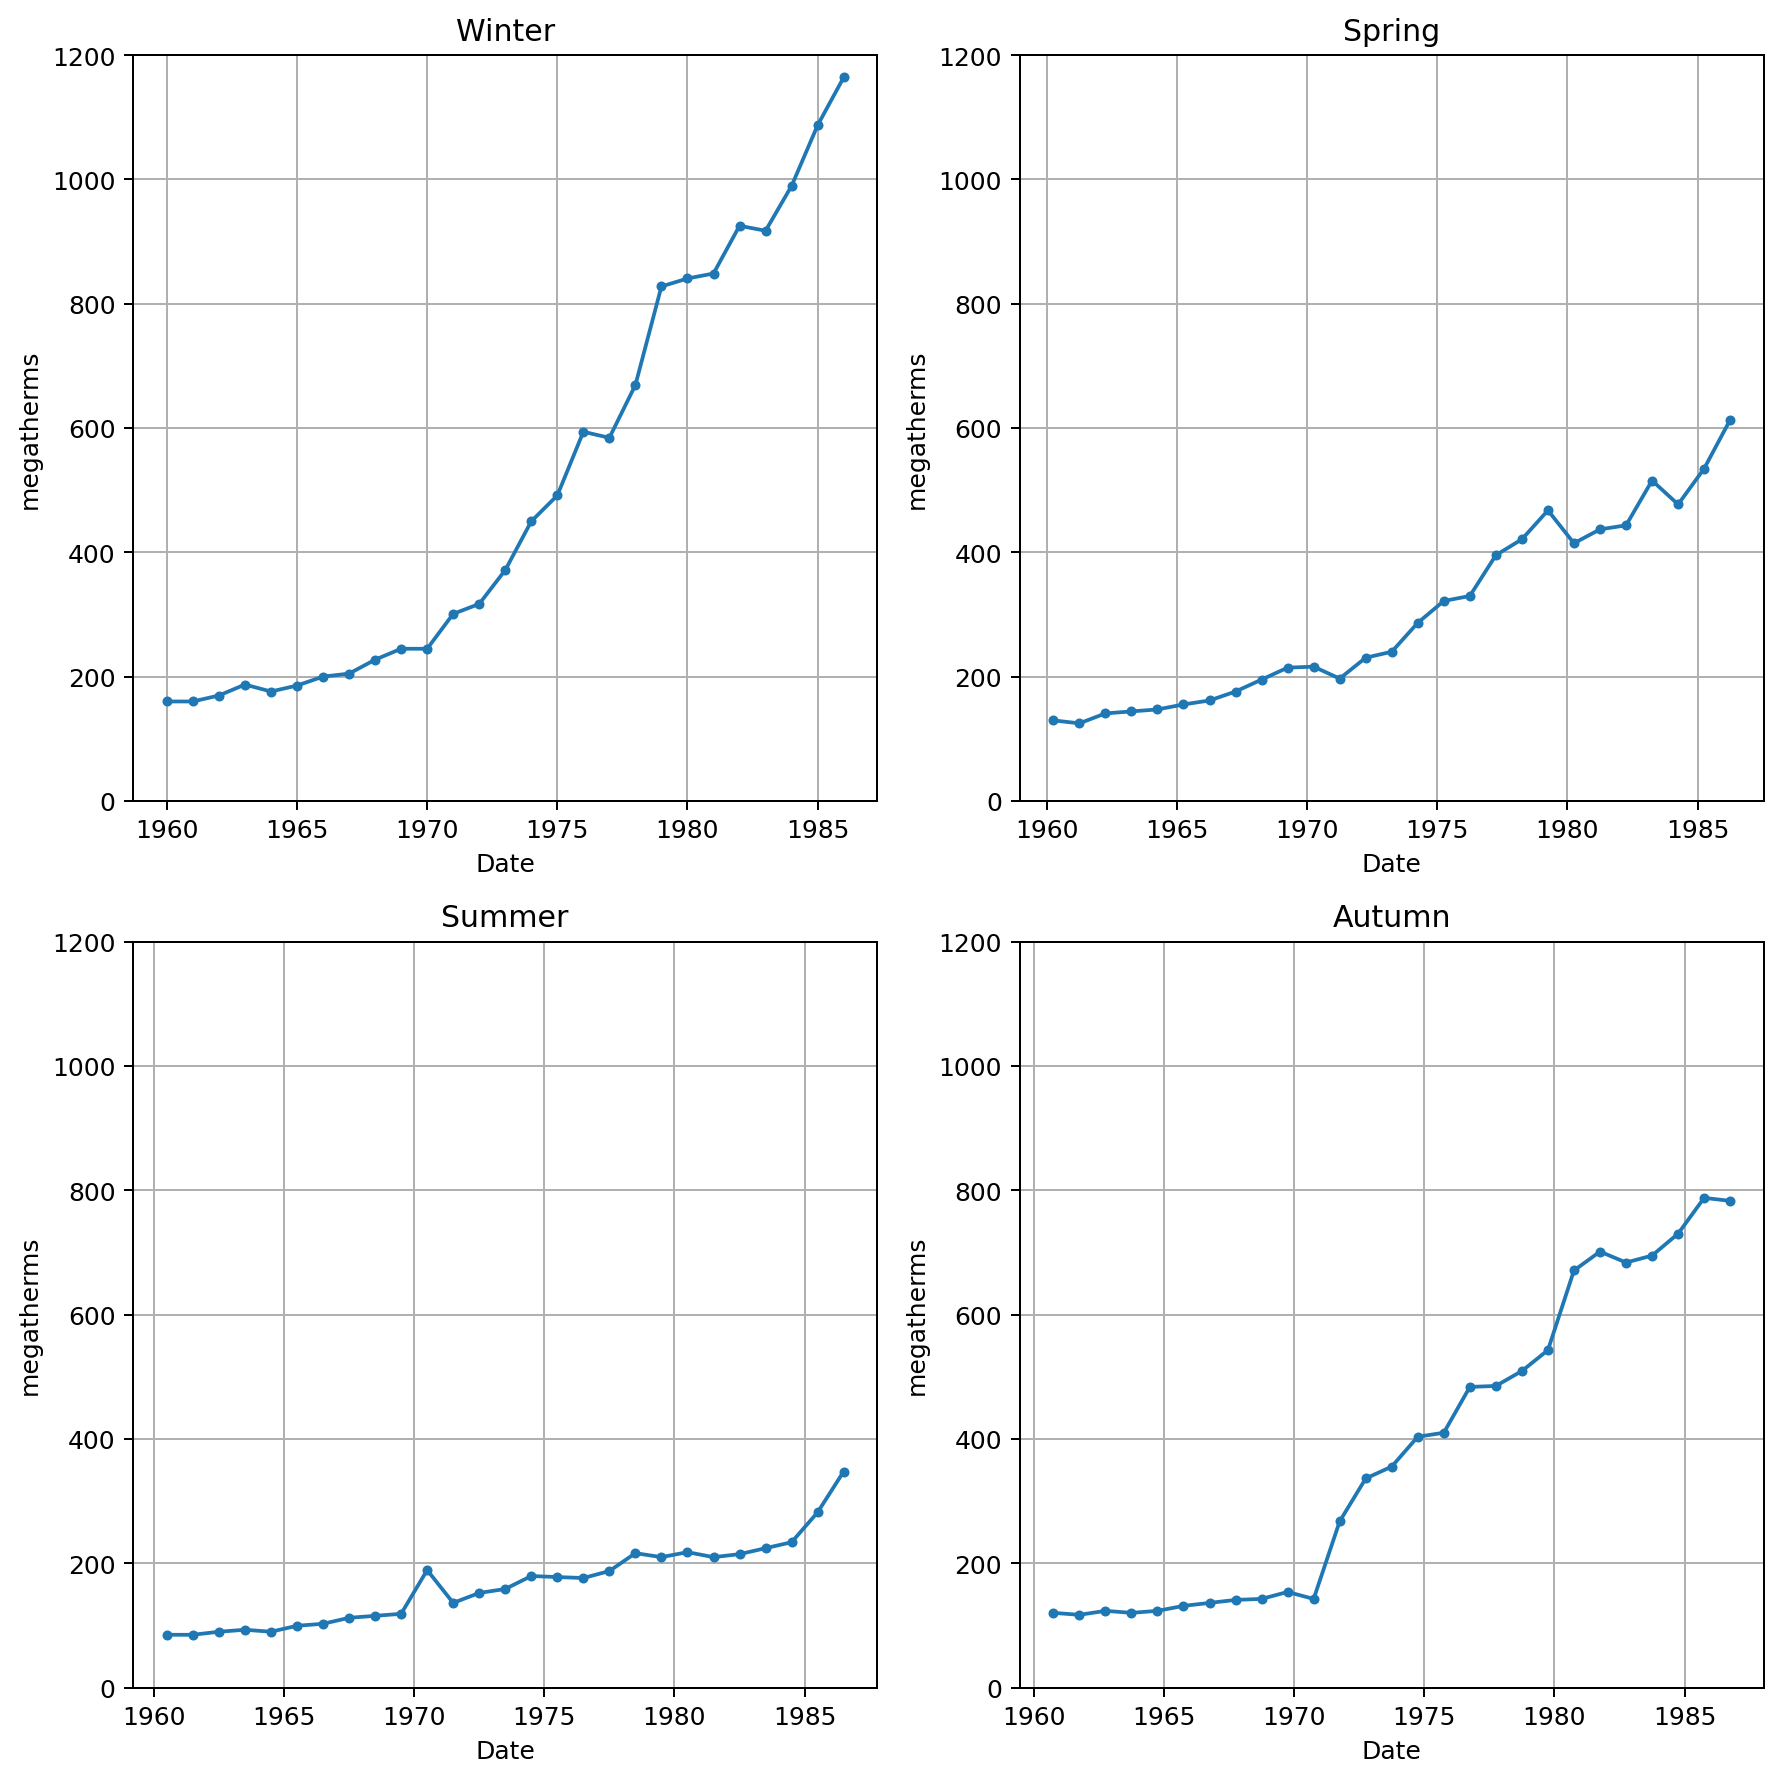

In [88]:
fig = plt.figure(figsize=(10, 10))

# iterate over quarters
for ix, quarter, season in zip(
    [1, 2, 3, 4], [q1, q2, q3, q4], ["Winter", "Spring", "Summer", "Autumn"]
):
    ax = fig.add_subplot(2, 2, ix)

    ax.plot(quarter[:, 1], quarter[:, 2], marker=".")
    ax.set_xlabel("Date")
    ax.set_ylabel("megatherms")
    ax.grid("on")
    ax.set_title(season)
    ax.set_ylim(0, 1200)

fig.tight_layout()  # fix overlapping plots!

## Binning operations
### Histograms

Text(0, 0.5, 'Count of quarters')

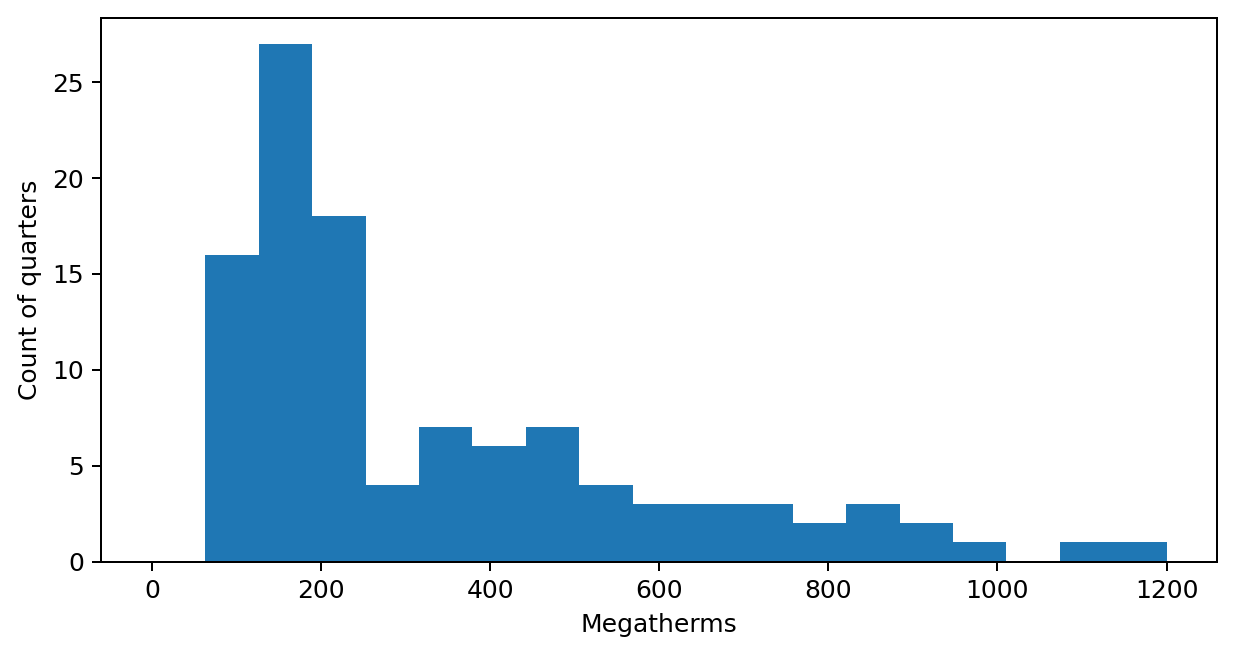

In [89]:

x = gas[:,2]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
bins = np.linspace(0,1200,20)
ax.hist(x, bins=np.linspace(0,1200,20));
ax.set_xlabel("Megatherms")
ax.set_ylabel("Count of quarters")

#### Colour maps

Colouring of markers is done via a **colour map**, which maps scalar values to colours. 

Colour maps should always be presented with a **colour bar** which shows the mapping of values to colours. This is an example of a **guide** used for an aesthetic **mapping** beyond the 2D coordinate system.


The colour map choice is important. A colour map maps a continuous variable $x$ to a colour, usually specified in the form of (red,green,blue) triplets. There are many choices for this mapping, but only a few *good* ones.

<img src="imgs/colormaps.png">

*Image: colormaps in matplotlib. Adapted from the [matplotlib documentation](https://matplotlib.org/examples/color/colormaps_reference.html)*


### Unsigned scalar
* If the data to be represented is a positive scalar (e.g. heights of people), use a colour map with **monotonically varying brightness**. This means that as the attribute increases, the colour map should get consistently lighter or darker.  `viridis` is good, as is `magma`. These are **perceptually uniform**, such that a change in value corresponds to a perceptually uniform change in intensity across the whole scale (the human visual system is very nonlinear, and these scales compensate for this nonlinearity). Grayscale or monochrome maps can be used, but colours with brightness+hue are often easier to interpret.

* **monotonic brightness** increasing data value always leads to an increase in visual brightness
* **perceptually uniform** a constant interval increase in data value leads to a perceptually constant increase in value.

### Perceptual linearity

<img src="imgs/mpl_colormaps.png">

**Colormaps shown in grayscale. Good scales should be monotonic (i.e. always increase/decrease in brightness)**

<img src="imgs/nonlinear_jet.png">

**BAD and NONLINEAR: the notches do not appear to be even**

<img src="imgs/linear_colors.jpg">

**GOOD and LINEAR: notches are even**



### The staircase and the bar
In some cases, it makes sense to join points with lines (because they form a continuous series), but we know that the value cannot have changed between measurements. For example, imagine a simulation of a coin toss experiment, plotting the cumulative sum of heads seen. 

In [90]:
np.random.seed(5)
coins = np.random.randint(0,2,(8,))
total_heads = np.cumsum(coins) 

Text(0.5, 1.0, 'Coin toss experiment')

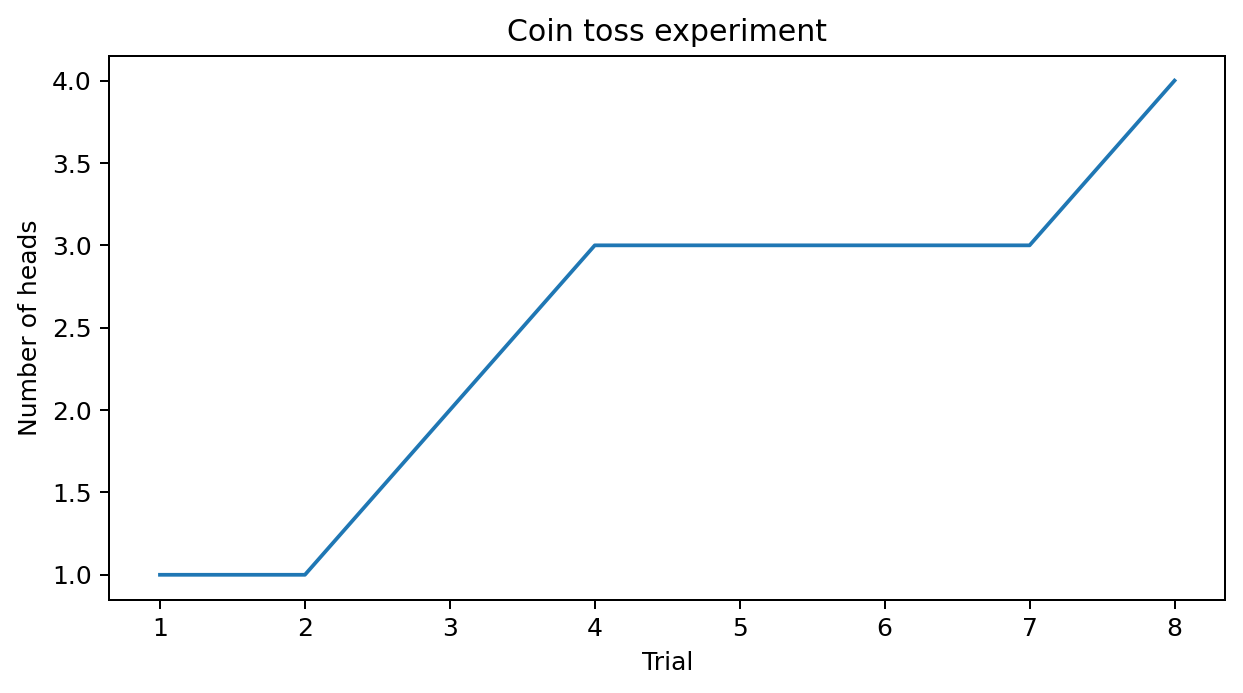

In [91]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
count = np.arange(len(total_heads))+1
ax.plot(count, total_heads)
ax.set_xlabel("Trial")
ax.set_ylabel("Number of heads")
ax.set_title("Coin toss experiment")

Text(0.5, 1.0, 'Coin toss experiment')

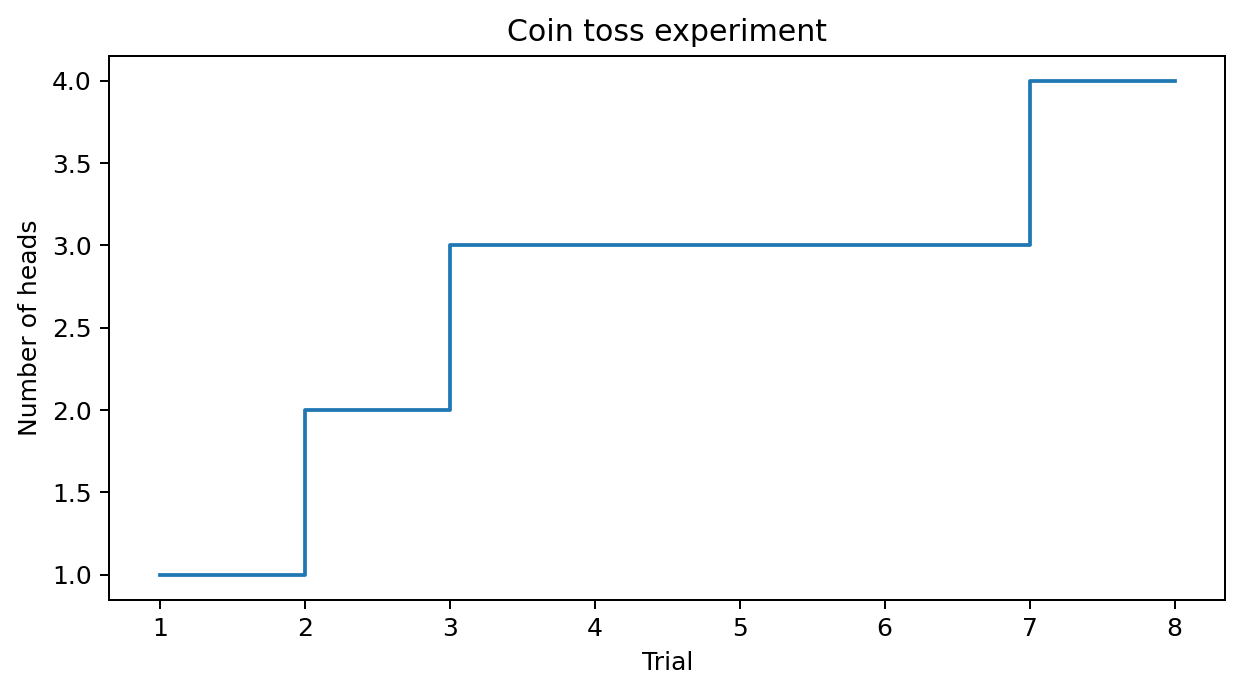

In [92]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.step(count, total_heads)
ax.set_xlabel("Trial")
ax.set_ylabel("Number of heads")
ax.set_title("Coin toss experiment")

Text(0.5, 1.0, 'UK gas usage, 1960-1986')

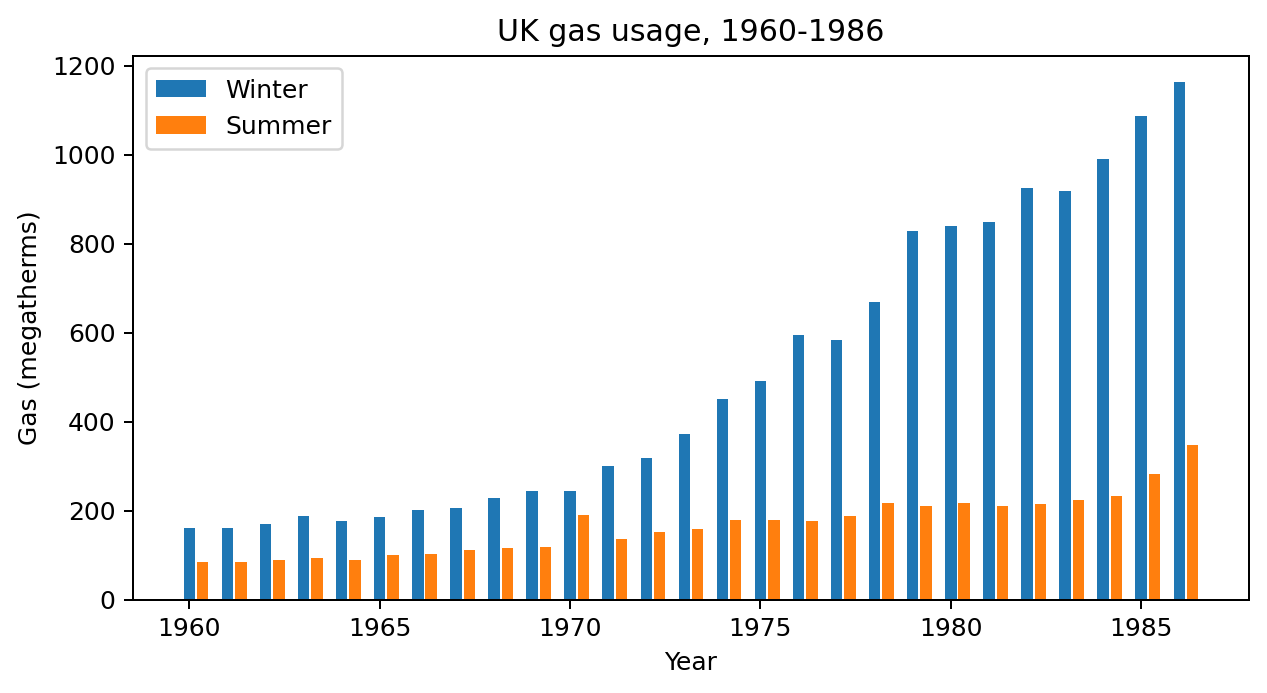

In [93]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.bar(q2[:,1]-0.25, q1[:,2], label="Winter", width=0.3)
ax.bar(q2[:,1]+0.1, q3[:,2], label="Summer", width=0.3)
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Gas (megatherms)")
ax.set_title("UK gas usage, 1960-1986")

## Alpha and transparency
### Alpha to mitigate geom overlap

In [94]:
# earthquake data
# columns
# lat,long,depth,mag,n_stations
quakes = np.loadtxt("data/quakes.txt")

Text(0, 0.5, 'Latitude')

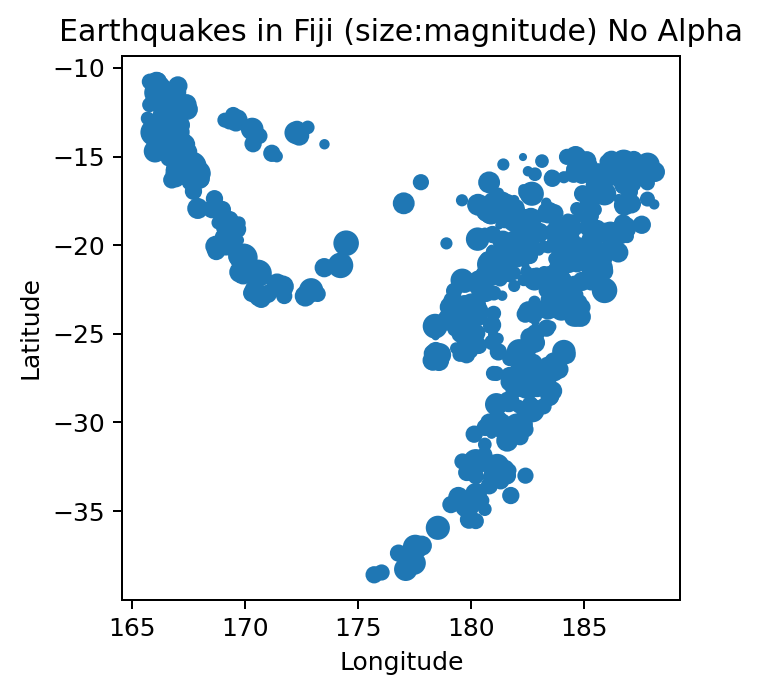

In [95]:
# low opacity
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
sizes = (quakes[:,3]-4.0) * 50#
paths = ax.scatter(quakes[:,1], quakes[:,0], s=sizes, alpha=1.0)
ax.set_title("Earthquakes in Fiji (size:magnitude) No Alpha")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

Text(0, 0.5, 'Latitude')

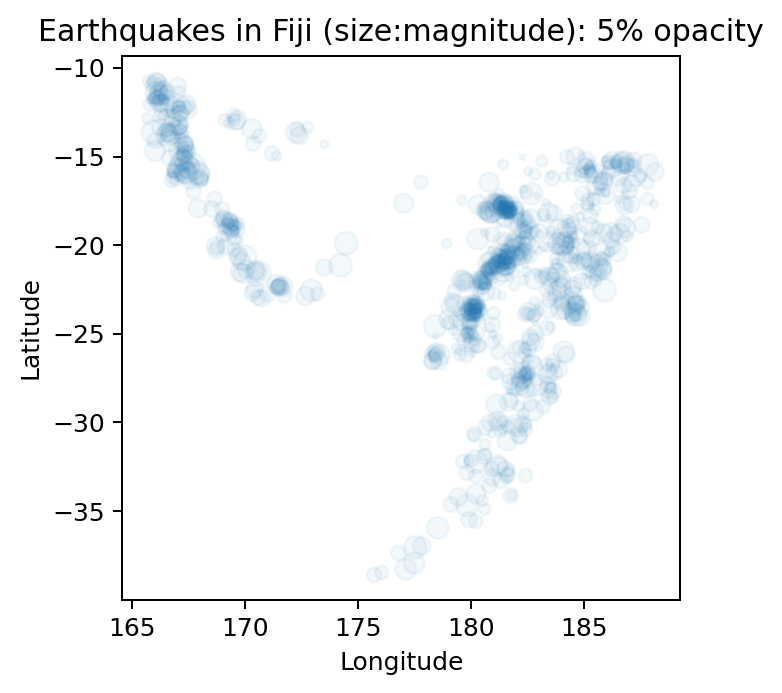

In [96]:
# low opacity
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
sizes = (quakes[:,3]-4.0) * 50#
paths = ax.scatter(quakes[:,1], quakes[:,0], s=sizes, 
                   alpha=0.05)
ax.set_title("Earthquakes in Fiji (size:magnitude): 5% opacity")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

## Probability

There are two different views of probability. Frequentist (what you learned at school) and Baysian.

The frequentist view of probabilty says that probabilities are the average frequency after many trials. So if a trial happens 100 times and there are 2 possible outcomes (say a coin toss) then the probability of outcome 1 is the number of times that outcome happens ($N_1$) divided by the total number of trials.

Taking the example of a coint toss the probability of heads is found by $$P_h = \frac{N_h}{N}$$ where N is the number of times the coin is tossed and $N_h$ is the number of times it come up heads. 

For a well understood problem we can infer the probability from how we know the system will behave. For a fair coin toss the probabilities of heads and tails should be the same: $$P_h = P_t = 0.5$$ For a fair dice roll the probability of each outcome should be the same $$P_1 = P_2 = P_3 = P_4 = P_5 = P_6 = \frac{1}{6}$$ For a fair deck of cards the probability of drawing any suit is equal
$$P_{hearts} = P_{spades} = P_{diamonds} = P_{clubs} = \frac{1}{4}$$ and the probability of drawing the ace of spades, or any card, is $$P_c = \frac{1}{52}$$

#### Example frequentist problems

##### You have a standard 6 sided die (faces have numbers 1-6 and it's equally likely to come up any of the 6 when rolled). What are the probabilities of:

Rolling a 6
$$P_6 = \frac{1}{6}$$
Rolling an even number
$$P_{even}= \frac{3}{6} = \frac{1}{2}$$
Roling a number greater than 4
$$P_{>4}= \frac{2}{6} = \frac{1}{3}$$

##### Another die has been biased by replacing the 1 with a second 6 so that the sides are {2,3,4,5,6,6). For this die what is the probability of:

Rolling a 6
$$P_6 = \frac{2}{6}= \frac{1}{3}$$
Rolling an even number
$$P_{even}= \frac{4}{6} = \frac{2}{3}$$
Roling a number greater than 4
$$P_{>4}= \frac{3}{6} = \frac{1}{2}$$

##### This biased die has been rolled twice and the results were 2 and 4. If the die is rolled twice more what is the probability of the four results including

Three of a kind
$$P_{three} = \frac{2}{6}\times\frac{1}{6}=\frac{2}{36}=\frac{1}{18}$$
Two sixes
$$P_{2-6} = \frac{2}{6}\times\frac{2}{6} = \frac{4}{36} = \frac{1}{9}$$
Any four consecutive numbers
$$P_{consecutive} = \frac{1}{6}\times\frac{1}{6} + \frac{1}{6}\times\frac{1}{6} = \frac{2}{36} = \frac{1}{18}$$

#### You have a reduced set of playing cards consisting of the cards Ace-8 for all four suits (32 cards in total) and you draw one card at randon from this deck.

Let A be the event that you drew a card greater than 2. Let B be the event you drew an even number. Calculate the consitional probability P(A|B) i.e you drew a card greater than 2 if you drew an even number.

$P(B)$ - probability of an even number = 1/2

$P(A \cap B)$ - probability it's even and greater than 2 = 3/8 

$P(A|B)$ - greater than 2 if it's even - what we are looking for

$$P(A|B) = \frac{P(A \cap B)}{P(B)} = \frac{3}{8}/\frac{1}{2} = \frac{3}{4}$$

### Expectation

A discrete random variable has the probability function

$$P(X=x) =  \begin{cases} 
      \frac{1}{5}(1-x) & x = 0,1,2,3 \\
      0 & otherwise  
   \end{cases}
$$

Calculate $E(X)$ the expectation of this random variable

Need to look at values and probabilities:


x=0, P(X=x)



| x | 0 | 1 | 2 | 3 |
| --- | --- | --- | --- | --- |
| P(X=x) | 1/5 | 0 | -1/5 | -2/5 |

$$E(X) = 0\times \frac{1}{5} + 1\times0 + 2\times \frac{-1}{5} + 3\times \frac{-2}{5} = \frac{-2}{5} + \frac{-6}{5} = \frac{-8}{5}$$

## Bayes Rule

A gambler visits a casino where there are two slot machines. One pays out 10% of the time and another is twice as generous, paying out 20% of the time. Naturally the gambler would prefer to play the more generous machine and as a test selects one of the machines at random and puts a coin in. Use Bayes' Rule to infer the probability that the machine chosen is the generous one, given that the game played is a losing one. Store the probability in a parameter named Bayes


$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

P(A) = Probability of generous machine (0.5)

P(B) = Mean probability game is lost (average of 0.8 and 0.9 = 0.85)

P(B|A) = Probability game is lost given that machine is generous (0.8)



In [20]:
BayesGamble = 0.8*0.5/0.85

In [21]:
BayesGamble

### Bayes II
In the fabrication of semiconductors, an industrial manufacturer has a process that produces
silicon wafers. Sometimes, the wafers come out defective, and have to be discarded.
The defect rate in one production line is 1 in 100000. The fabrication company learns of a new
device that can predict whether the wafer will be defective after only a few seconds with a
reliability of 99%. This will allow the fabricator to pull the wafer and abort the production
process before the more expensive lithography process begins. Explain how Bayes’ rule
would help the fabricator decide if this device is a worthwhile investment and give your
recommendation based on these figures. You do not have to provide an exact calculation
but you should give approximate figures. State any assumptions you make.

Write T=0 to mean test is negative, and T=1 to mean test is positive.
Assuming that 99% reliability means that:

P(T=1|D=1) = 0.99

P(T=0|D=0) = 0.99

then

P(T=1|D=0) = 0.01

P(T=0|D=1) = 0.01

We want to use Bayes rule so also need P(D=1) - probability it is defective = 0.00001

The probability that a wafer is defective given that the test is positive is:
$$P(D=1|T=1) = P(T=1|D=1)P(D=1) / P(T=1)$$ 



$$P(D=1|T=1) = 0.99 * 0.00001 / (P(T=1|D=1)P(D=1) + P(T=1|D=0)P(D=0))$$

$$= 0.99*0.00001 / [ 0.00001 + 0.01 ]$$ [note: 0.99 has been rounded off to 1]
$$= 0.00001 / 0.01$$ [rounding 0.00001 off to 0.0]
$$= 0.001$$ [2 for any answer within an order of magnitude]
For every thousand wafers pulled when the test was positive, just one would be expected
to actually be faulty. Unless the cost of pulling the wafer is extremely small, this test is
nearly useless given the rarity of defects.